# AAI 530 IoT Final Project EDA

In [1]:
# Import Packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt


In [2]:
# Read a csv to begin exploring data 
apr_df = pd.read_csv("uber-raw-data-apr14.csv")
apr_df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [3]:
# Print rows with null values
apr_df[apr_df.isna().any(axis=1)]

,Date/Time,Lat,Lon,Base


In [4]:
# Format Date/Time column into datetime object

apr_df['Date/Time'] =  pd.to_datetime(apr_df['Date/Time'])

# Create new columns with day of month, time, and day of week
apr_df['Day'] = apr_df['Date/Time'].dt.day
apr_df['Time'] = apr_df['Date/Time'].dt.time
apr_df['Day_week'] = apr_df['Date/Time'].dt.dayofweek
apr_df.head()


,Date/Time,Lat,Lon,Base,Day,Time,Day_week
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,00:11:00,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,00:17:00,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,00:21:00,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,00:28:00,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,00:33:00,1


Text(0.5, 1.0, 'Pickup Locations')

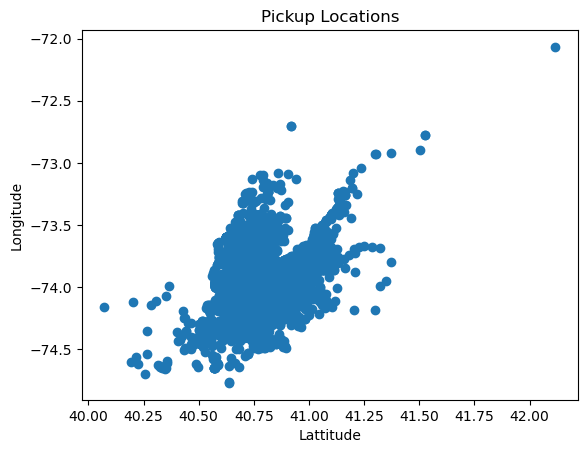

In [5]:
plt.scatter(apr_df['Lat'],apr_df['Lon'])
plt.xlabel('Lattitude')
plt.ylabel('Longitude')
plt.title('Pickup Locations')

<AxesSubplot:xlabel='Base', ylabel='count'>

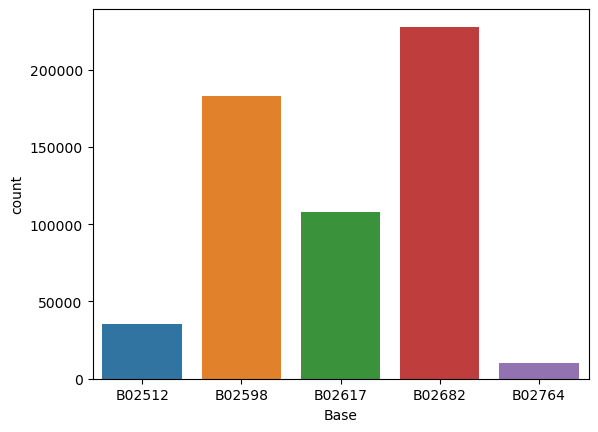

In [6]:
sns.countplot(x = apr_df['Base'])

In [7]:
apr_df['Day_week'].describe()

count    564516.00000
mean          2.86698
std           1.82081
min           0.00000
25%           1.00000
50%           3.00000
75%           4.00000
max           6.00000
Name: Day_week, dtype: float64

Text(0.5, 1.0, 'Number of Rides By Weekday')

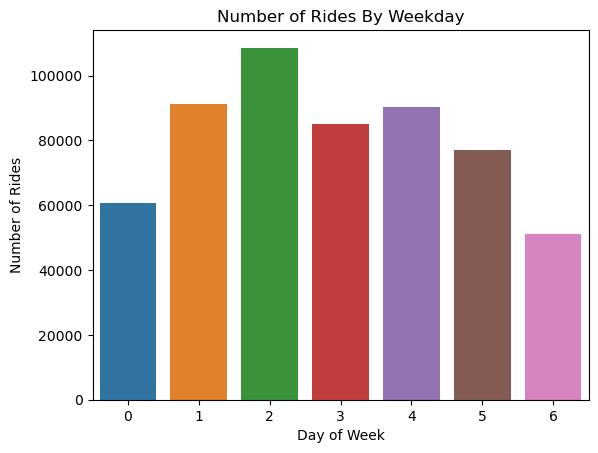

In [8]:
# Plot weekday counts, 0 = monday to 6 = Sunday
sns.countplot(x = apr_df['Day_week'])
plt.ylabel("Number of Rides")
plt.xlabel("Day of Week")
plt.title("Number of Rides By Weekday")

Text(0.5, 1.0, 'Number of Rides in April')

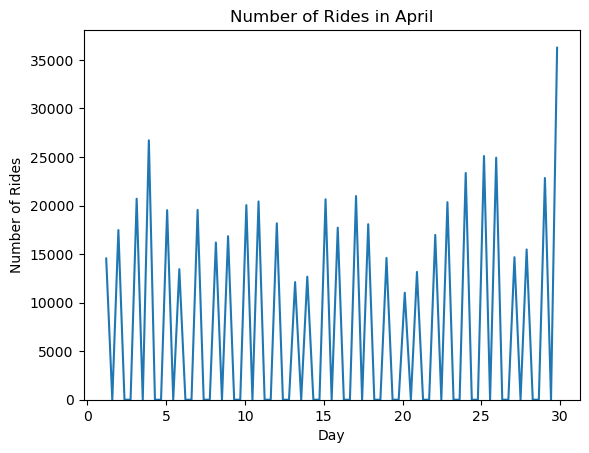

In [9]:
# Plot change in rides throughout month
sns.histplot(x = apr_df['Day'],element = 'poly',fill = False)
plt.ylabel("Number of Rides")
plt.title("Number of Rides in April")